In this notebook, the implicit relaxation method is used for solving the Grad-Shafranov equation.

The tube starts at z=0.7Mm and ends at z=10Mm. 

The horizontal size of the simulation box is W=7Mm.

Bz at z=0.7Mm is 130 Gauss.

Solar surface (z=0km) is defined as the location of tau_5000=1, where tau is optical depth. 

In [7]:
import numpy as np
import os
from pathlib import Path
from functions import finite_difference as fd
from parameters import input_values as iv
from functions import B_lattice as B_LT

##################
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc, rcParams
# Make use of TeX\ufeff
rc('text',usetex=True)
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})
rcParams['figure.figsize'] = 6, 6
rcParams['axes.linewidth'] = 1
rcParams['xtick.major.size'] = 9
rcParams['xtick.major.width'] = 1.35
rcParams['xtick.minor.size'] = 6
rcParams['xtick.minor.width'] = 1.25
rcParams['ytick.major.size'] = 9
rcParams['ytick.major.width'] = 1.35
rcParams['ytick.minor.size'] = 6
rcParams['ytick.minor.width'] = 1.25
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.major.pad']='6'
rcParams['xtick.major.pad']='6'

# Start the calculation

### First, make sure all the folders are in place. 
Delete all the previous files to avoid any confusion 

In [4]:
directory_path_1 = os.path.join(os.getcwd(), iv.B_LT_output_dir, 'data/')
directory_path_2 = os.path.join(os.getcwd(), iv.B_LT_output_dir, 'u_sol/')
directory_path_3 = os.path.join(os.getcwd(), iv.B_LT_output_dir, 'tube_grid_point/')
directory_path_4 = os.path.join(os.getcwd(), iv.B_LT_output_dir, 'nearby_point/')
if not os.path.exists(directory_path_1):
    os.makedirs(directory_path_1)
if not os.path.exists(directory_path_2):
    os.makedirs(directory_path_2)
if not os.path.exists(directory_path_3):
    os.makedirs(directory_path_3)
if not os.path.exists(directory_path_4):
    os.makedirs(directory_path_4)
####
current_dir = os.getcwd()+'/'
[f.unlink() for f in Path(directory_path_1).glob("*") if f.is_file()];
[f.unlink() for f in Path(directory_path_2).glob("*") if f.is_file()];
[f.unlink() for f in Path(directory_path_3).glob("*") if f.is_file()];
[f.unlink() for f in Path(directory_path_4).glob("*") if f.is_file()];
[f.unlink() for f in Path(current_dir+iv.B_LT_output_dir).glob("*") if f.is_file()];

### Next, start the calculation iteration

In [5]:
theta_relaxation = 0.8
N_iter = 100
delta_c_min = 1e-4


current_dir = os.getcwd()+'/'
np.save(iv.B_LT_output_dir+'N_iter.npy', N_iter)

fd.calculate_data(0, theta_relaxation)  # zeroth iteration, the initial field psi is the boundary condition.
for n_iteration in range(1, N_iter+1):
    fd.calculate_data(n_iteration, theta_relaxation)
    delta_c_nth = fd.Delta_c(n_iteration)
    print('n_iteration=%i, delta_c=%.2e' %(n_iteration, delta_c_nth))
    
    if n_iteration >= 2:
        os.remove(current_dir+iv.B_LT_output_dir+'data/data%i.npy'%(n_iteration-2))
        os.remove(current_dir+iv.B_LT_output_dir+'u_sol/u_sol%i.npy'%(n_iteration-2))
        os.remove(current_dir+iv.B_LT_output_dir+'nearby_point/Lower_Right%i.npy'%(n_iteration-1))
        os.remove(current_dir+iv.B_LT_output_dir+'nearby_point/Upper_Left%i.npy'%(n_iteration-1))
        os.remove(current_dir+iv.B_LT_output_dir+'tube_grid_point/tube_grid_point_%i.npy'%(n_iteration-1))
    
    if delta_c_nth <= delta_c_min:
        np.save(iv.B_LT_output_dir+'N_iter.npy', n_iteration)
        break

n_iteration=1, delta_c=8.47e-03
n_iteration=2, delta_c=4.07e-03
n_iteration=3, delta_c=2.50e-03
n_iteration=4, delta_c=1.82e-03
n_iteration=5, delta_c=1.62e-03
n_iteration=6, delta_c=1.45e-03
n_iteration=7, delta_c=1.53e-03
n_iteration=8, delta_c=1.37e-03
n_iteration=9, delta_c=1.15e-03
n_iteration=10, delta_c=1.00e-03
n_iteration=11, delta_c=6.51e-04
n_iteration=12, delta_c=4.95e-04
n_iteration=13, delta_c=2.09e-03
n_iteration=14, delta_c=1.61e-03
n_iteration=15, delta_c=1.32e-03
n_iteration=16, delta_c=1.22e-03
n_iteration=17, delta_c=8.05e-04
n_iteration=18, delta_c=1.45e-03
n_iteration=19, delta_c=1.36e-03
n_iteration=20, delta_c=1.41e-03
n_iteration=21, delta_c=1.02e-03
n_iteration=22, delta_c=9.01e-04
n_iteration=23, delta_c=8.97e-04
n_iteration=24, delta_c=7.76e-04
n_iteration=25, delta_c=5.16e-04
n_iteration=26, delta_c=2.33e-04
n_iteration=27, delta_c=1.05e-03
n_iteration=28, delta_c=1.17e-03
n_iteration=29, delta_c=1.38e-03
n_iteration=30, delta_c=1.03e-03
n_iteration=31, del

# Generate plots

### Plotting the network field

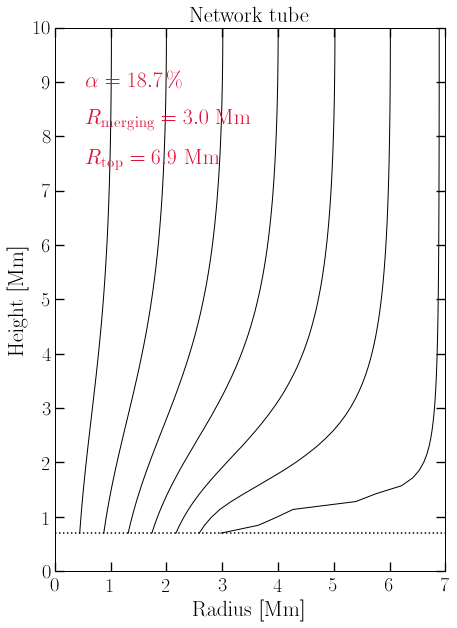

In [30]:
iteration_time = np.load(iv.B_LT_output_dir+'N_iter.npy')

#######################################################################
total_magnetic_flux = np.pi * (0.5*iv.hr)**2 * B_LT.Bz_lattice(0, 0, iteration_time)
for i in range(1, int(iv.R_star/iv.hr)):
    total_magnetic_flux += 2*np.pi * i * iv.hr**2 * B_LT.Bz_lattice(i, 0, iteration_time)
total_magnetic_flux += np.pi * iv.hr**2 * 0.5 * (2*(iv.R_star/iv.hr)-0.5) * B_LT.Bz_lattice(i+1, 0, iteration_time)

tube_edge_indices = np.array([fd.tube_radius(j, iteration_time) for j in range(iv.N_side)])
tube_edge = tube_edge_indices * iv.hr

flux_frac = np.array([0.023, 0.089, 0.2, 0.35, 0.545, 0.775])
tube_i_edge_list = []
for i in range(len(flux_frac)):
    tube_i_edge = iv.hr * np.array([fd.phi_radius(j, iteration_time, total_magnetic_flux * flux_frac[i]) for j in range(iv.N_side)])
    tube_i_edge_list += [tube_i_edge]

height = np.arange(0, iv.N_side, 1) * iv.hz

#######################################################################
radius_surface = np.interp(0e5, (height+ iv.z_bottom), tube_edge)
radius_ztop    = np.interp(iv.z_top, (height+ iv.z_bottom), tube_edge)
alpha_run      = (radius_surface/radius_ztop)**2
#######################################################################



#### start the plt ####
fig, ax1 = plt.subplots(figsize=(7, 10))
ax2 = ax1.twinx()
ax3 = ax1.twiny()

# edge of flux tube
ax1.plot(tube_edge/1e8, height/1e8 + iv.z_bottom/1e8, color='black', linewidth=1)

# tube interior
for i in range(len(flux_frac)):
    ax1.plot(tube_i_edge_list[i]/1e8, height/1e8 + iv.z_bottom/1e8, color='black', linewidth=1)

# horizontal line at z = 700 km
ax1.plot([0, 10], [iv.z_bottom/1e8, iv.z_bottom/1e8], ':', color='black', linewidth=1.5)
    

ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlim(0, iv.W/1e8)
ax3.set_xlim(0, iv.W/1e8)
ax1.set_ylim(0/1e8, iv.z_top/1e8)
ax2.set_ylim(0/1e8, iv.z_top/1e8)
ax1.set_xlabel(r'Radius~[Mm]', fontsize=22)
ax1.set_ylabel(r'Height~[Mm]', fontsize=22)


x_ticks = np.arange(0, (iv.W/1e8) + 1, 1)
x_labels = [r'%i'%i for i in x_ticks]
ax1.set_xticks(x_ticks, x_labels, fontsize=20)
ax3.set_xticks(x_ticks, [], fontsize=20)

y_ticks = np.arange(0, (iv.z_top/1e8) + 1, 1)
y_labels = [r'%i'%i for i in y_ticks]
ax1.set_yticks(y_ticks, y_labels, fontsize=20)
ax2.set_yticks(y_ticks, [], fontsize=20)

# ax1.tick_params(axis='both', which='major', pad=6)

ax1.text(0.08, 0.90, r'$\alpha=%.1f\,\%%$'%(alpha_run*100), fontsize=22, color='crimson', ha='left', va='center', transform=ax1.transAxes)
ax1.text(0.08, 0.83, r'$R_{\rm merging}=%.1f$~Mm'%(radius_surface/1e8), fontsize=22, color='crimson', ha='left', va='center', transform=ax1.transAxes)
ax1.text(0.08, 0.76, r'$R_{\rm top}=%.1f$~Mm'%(radius_ztop/1e8), fontsize=22, color='crimson', ha='left', va='center', transform=ax1.transAxes)

plt.title(r'Network tube', fontsize=22)

plt.savefig('plots/network_tube.pdf', bbox_inches='tight')
plt.show()
plt.close()

### Plotting the stream function

In [31]:
# Plotly plots
import plotly.graph_objects as go

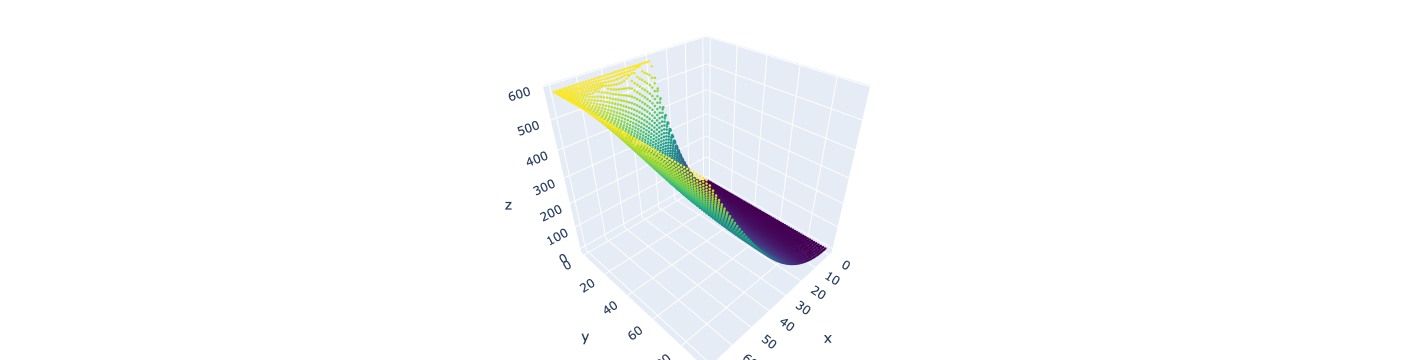

In [32]:
n_iteration_data_plot = np.load(iv.B_LT_output_dir+'N_iter.npy')
data_plot = np.load(iv.B_LT_output_dir+'data/data%i.npy'%n_iteration_data_plot)

fig = go.Figure(data=[go.Scatter3d(
        x=np.transpose(data_plot)[0]/1e7, y=np.transpose(data_plot)[1]/1e7, z=np.transpose(data_plot)[2]/1e16,
        mode='markers',
        marker=dict(
        size = 1.5 ,
        color=np.transpose(data_plot)[2],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale, 'Viridis'
        opacity=1
        )
        )])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
# fig.write_image('plots/streamfuction.pdf')
fig.show()